<a href="https://colab.research.google.com/github/imdeja/DS-Unit-4-Sprint-2-Neural-Networks/blob/master/module3-Intro-to-Keras/Jake_Dennis_LS_DS_433_Keras_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Neural Network Framework (Keras)

## *Data Science Unit 4 Sprint 2 Assignment 3*

## Use the Keras Library to build a Multi-Layer Perceptron Model on the Boston Housing dataset

- The Boston Housing dataset comes with the Keras library so use Keras to import it into your notebook. 
- Normalize the data (all features should have roughly the same scale)
- Import the type of model and layers that you will need from Keras.
- Instantiate a model object and use `model.add()` to add layers to your model
- Since this is a regression model you will have a single output node in the final layer.
- Use activation functions that are appropriate for this task
- Compile your model
- Fit your model and report its accuracy in terms of Mean Squared Error
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Run this same data through a linear regression model. Which achieves higher accuracy?
- Do a little bit of feature engineering and see how that affects your neural network model. (you will need to change your model to accept more inputs)
- After feature engineering, which model sees a greater accuracy boost due to the new features?

In [4]:
import numpy as np
from tensorflow import keras
from tensorflow.keras.datasets import boston_housing
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

57344/57026 [==============================] - 0s 0us/step


In [5]:
X_train = keras.utils.normalize(X_train)
X_test = keras.utils.normalize(X_test)
X_train.shape, y_train.shape

((404, 13), (404,))

In [0]:
import os
import datetime
import tensorflow as tf
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler

In [7]:
# Instantiate a model object and use model.add() to add layers to your model
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

stop = EarlyStopping(monitor='val_loss', min_delta=0.01, patience=3)

model = Sequential()
model.add(Dense(14, input_shape=(13,), activation='relu')) #elu 10
model.add(Dense(54, activation='relu')) 
model.add(Dense(1, activation='relu'))

# Compile your model
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['MeanSquaredError'])

# Fit your model and report its accuracy in terms of Mean Squared Error
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), callbacks=[tensorboard_callback, stop])

Epoch 1/100
13/13 [==============================] - 0s 17ms/step - loss: 22.3374 - mean_squared_error: 583.7354 - val_loss: 22.8951 - val_mean_squared_error: 607.5292
Epoch 2/100
13/13 [==============================] - 0s 5ms/step - loss: 22.0817 - mean_squared_error: 572.2263 - val_loss: 22.5970 - val_mean_squared_error: 593.6564
Epoch 3/100
13/13 [==============================] - 0s 5ms/step - loss: 21.7467 - mean_squared_error: 557.2849 - val_loss: 22.2081 - val_mean_squared_error: 576.1019
Epoch 4/100
13/13 [==============================] - 0s 5ms/step - loss: 21.2989 - mean_squared_error: 537.9429 - val_loss: 21.6726 - val_mean_squared_error: 552.4790
Epoch 5/100
13/13 [==============================] - 0s 5ms/step - loss: 20.6716 - mean_squared_error: 511.4233 - val_loss: 20.9217 - val_mean_squared_error: 520.3428
Epoch 6/100
13/13 [==============================] - 0s 5ms/step - loss: 19.8066 - mean_squared_error: 476.2785 - val_loss: 19.9031 - val_mean_squared_error: 478.47

In [8]:
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


ogdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

stop = EarlyStopping(monitor='mse', min_delta=0.01, patience=3)

model = Sequential([
    Flatten(),
    Dense(32, input_dim = 404, activation='elu'),
    Dense(32, activation='elu'),
    Dense(1)
])

# Complile the model (report accuracy in terms of Mean Squared Error)
model.compile(loss='mae', optimizer='adam', metrics=['mse'])

# Fit the model 
history = model.fit(
    x = X_train_scaled,
    y = y_train,
    epochs = 100,
    validation_data = (X_test_scaled, y_test),
    callbacks = [tensorboard_callback, stop], 
)

Epoch 1/100
13/13 [==============================] - 0s 12ms/step - loss: 22.2433 - mse: 581.3000 - val_loss: 22.2574 - val_mse: 579.9581
Epoch 2/100
13/13 [==============================] - 0s 5ms/step - loss: 20.9584 - mse: 525.3644 - val_loss: 20.8761 - val_mse: 520.1268
Epoch 3/100
13/13 [==============================] - 0s 5ms/step - loss: 19.4242 - mse: 463.2597 - val_loss: 19.1494 - val_mse: 450.7133
Epoch 4/100
13/13 [==============================] - 0s 5ms/step - loss: 17.4711 - mse: 392.3913 - val_loss: 16.9465 - val_mse: 370.7917
Epoch 5/100
13/13 [==============================] - 0s 5ms/step - loss: 14.9983 - mse: 310.7842 - val_loss: 14.2779 - val_mse: 282.4120
Epoch 6/100
13/13 [==============================] - 0s 5ms/step - loss: 12.0606 - mse: 227.2547 - val_loss: 11.2860 - val_mse: 194.0828
Epoch 7/100
13/13 [==============================] - 0s 5ms/step - loss: 9.1284 - mse: 153.1733 - val_loss: 8.6859 - val_mse: 127.4940
Epoch 8/100
13/13 [=======================

In [9]:
print(history.history.keys())

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])


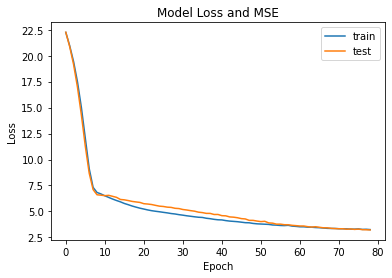

In [10]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
# plt.plot(history.history['mean_squared_error'])
# plt.plot(history.history['val_mean_squared_error'])
plt.title('Model Loss and MSE')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show();

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse

(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train_scaled, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
y_predict = model.predict(X_test_scaled)
print(f'MSE: {mse(y_test, y_predict)}')
#big improvement

MSE: 23.19559925642293


## Use the Keras Library to build an image recognition network using the Fashion-MNIST dataset (also comes with keras)

- Load and preprocess the image data similar to how we preprocessed the MNIST data in class.
- Make sure to one-hot encode your category labels
- The number of nodes in your output layer should equal the number of classes you want to predict for Fashion-MNIST.
- Try different hyperparameters. What is the highest accuracy that you are able to achieve.
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Remember that neural networks fall prey to randomness so you may need to run your model multiple times (or use Cross Validation) in order to tell if a change to a hyperparameter is truly producing better results.

In [13]:
from tensorflow.keras.datasets import  fashion_mnist
# Load and preprocess the image data similar to how we preprocessed the MNIST data in class.
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# X variable types
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.

# Encode categorical labels
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

X_train.shape, y_train.shape

4423680/4422102 [==============================] - 0s 0us/step


((60000, 28, 28), (60000, 10))

In [14]:
functions = ['relu', 'elu', 'selu', 'softplus', 'softsign', 'swish', 'tanh']

for activation in functions:
  model2 = Sequential([
      Flatten(input_shape=(28, 28)),
      Dense(15, activation=activation),
      Dense(10, activation='softmax')
  ])

  model2.compile(loss = 'categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])

  model2.fit(
      x = X_train, 
      y = y_train,
      epochs = 10,
      validation_data = (X_test, y_test)
  )

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6293 - accuracy: 0.7916 - val_loss: 0.4947 - val_accuracy: 0.8241
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4413 - accuracy: 0.8468 - val_loss: 0.4639 - val_accuracy: 0.8392
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4111 - accuracy: 0.8579 - val_loss: 0.4381 - val_accuracy: 0.8464
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3945 - accuracy: 0.8628 - val_loss: 0.4211 - val_accuracy: 0.8509
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3841 - accuracy: 0.8650 - val_loss: 0.4148 - val_accuracy: 0.8560
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3734 - accuracy: 0.8689 - val_loss: 0.4357 - val_accuracy: 0.8512
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3646 - accuracy: 0.8715 - val_loss: 0.4169 - val_accuracy:

In [15]:
stop = EarlyStopping(monitor='val_accuracy', min_delta=0.01, patience=3)

model2 = Sequential([
      Flatten(input_shape=(28, 28)),
      Dense(15, activation='relu'),
      Dense(10, activation='softmax')
  ])

model2.compile(loss = 'categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])

history = model2.fit(
      x = X_train, 
      y = y_train,
      epochs = 100,
      validation_data = (X_test, y_test),
      callbacks = [stop]
  )

Epoch 1/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5896 - accuracy: 0.7986 - val_loss: 0.4913 - val_accuracy: 0.8284
Epoch 2/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4393 - accuracy: 0.8468 - val_loss: 0.4520 - val_accuracy: 0.8396
Epoch 3/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4118 - accuracy: 0.8564 - val_loss: 0.4561 - val_accuracy: 0.8424
Epoch 4/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3990 - accuracy: 0.8602 - val_loss: 0.4402 - val_accuracy: 0.8451
Epoch 5/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3890 - accuracy: 0.8639 - val_loss: 0.4282 - val_accuracy: 0.8512
Epoch 6/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3823 - accuracy: 0.8670 - val_loss: 0.4414 - val_accuracy: 0.8447
Epoch 7/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3755 - accuracy: 0.8679 - val_loss: 0.4141 - val_ac

In [16]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

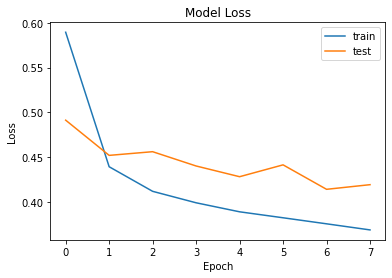

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show();

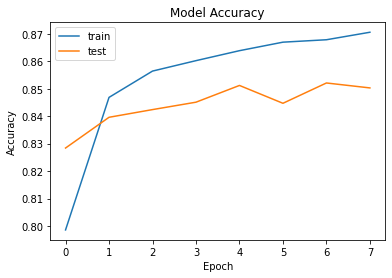

In [18]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show();

## Stretch Goals:

- Use Hyperparameter Tuning to make the accuracy of your models as high as possible. (error as low as possible)
- Use Cross Validation techniques to get more consistent results with your model.
- Use GridSearchCV to try different combinations of hyperparameters. 
- Start looking into other types of Keras layers for CNNs and RNNs maybe try and build a CNN model for fashion-MNIST to see how the results compare.